## False Position

The False Position is another bracketing method for finding a root of a non-linear equation. It is also called the Regula Falsi Method. The concept of this method is to find a root of a non-linear equation or function through a straight line given two initial boundaries, $a$ and $b$, where a root will crosses the axis. The basic idea for estimating a root is, a function of given $x$ value, $y(x)$, is equal to $0$. The numerical approach of False Position to get this solution is written in Equation 1

**Equation 1**

$x_r = \frac{a f(b) - b f(a)} {f(b) - f(a)}$

where

- $x_r$ is a root
- $f(a)$ a function that given by value of $a$
- $f(b)$ a function that given by value of $b$
- $a$ is a initial boundary
- $b$ is a final boundary

### Stopping Criteria

We can use the relative error criterion for the stopping iteration process.

- First, we define the tollerance error, $e_{tol}$
- Seconf, give the first the guess value of $x_n$
- Third, calculate the relative error by using te following equation


**Equation 2**

$e_{rel} = |\frac{x_{n+1} - x_n} {x_{n+1}}| \le e_{tol}$

if the $e_{rel}$ is less than $e_{tol}$, the process will be stopped.

## Algorithm of False Position

1. Defining the initial boundaries, $a$, $b$, and error limit.
2. Checking the existing of a root for this boundaries by condition of $f(a) f(b) < 0$. If the root does not exist, redefining the initial boundaries. If it does, proceed to the next step.
3. Calculating the new root by using Equation 1.
4. Checking the solution
    - if $f(a) f(x_r) < 0$, then the solution is in the range of $a$ and $x_r$. Therefore, $b = x_r$.
    - Otherwise, $f(a) f(x_r) > 0$, then the solution is in the range of $x_r$ and $b$. Therefore, $a = x_r$.
5. Calculating the relative error by using Equation 2. If the relative error is less than the error limit, the process will be stopped, and the final root is addressed. Otherwise, the process will be continued to the next iteration.

### Case 1

There is a function of $f(x) = x^2 - 4 = 0$. Find its root using the False Position method. Note, as we know that the analytical solution of this function is $x=2$ or $x=-2$. Therefore, the root lies in the negative and positive range. First, we try to set the initial boundary $a = 0$ and final boundary $b = 4$, where the assumption is that the root is in this range.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def falseposition(f,a,b,e_rel=1,e_tol=1e-5):
    '''
    Input:

    :f: a function
    :a: initial value boundary
    :b: final value boundary
    :e_rel: initial error relative, default is 1, indicating to 100%
    :e_tol: minimum error tollerance, default is 1e-5

    Output:

    :xr: a root
    :e_collect: colelcting error calculation from each iteration
    '''

    if f(a) * f(b) < 0:
        print(f"The root is possible in the range between {a} and {b}")

        e_collect = []
        while e_rel >= e_tol:

            xr = ((a * f(b)) - (b * f(a))) / (f(b) - f(a))

            if f(a) * f(xr) < 0:
                xr_old = b
                b = xr
            else:
                xr_old = a
                a = xr

            e_rel = np.abs((xr - xr_old) / xr)
            e_collect.append(e_rel)
    else:
        print(f"The product between two limit function exceed boundary, f(a) * f(b) [{f(a) * f(b)} > 0], Please define new initial boundaries")

        xr = 0
        e_collect = []

    return xr, e_collect

In [4]:
a = 0
b = 4

# creating a simple function using lambda
f = lambda x: x**2 - 4

xroot, e_iter = falseposition(f,a,b)

print('The approximation root is: %f' % xroot)
print('The relative error is: %f' % e_iter[-1])

The root is possible in the range between 0 and 4
The approximation root is: 1.999992
The relative error is: 0.000008


Text(0, 0.5, 'Relative Error')

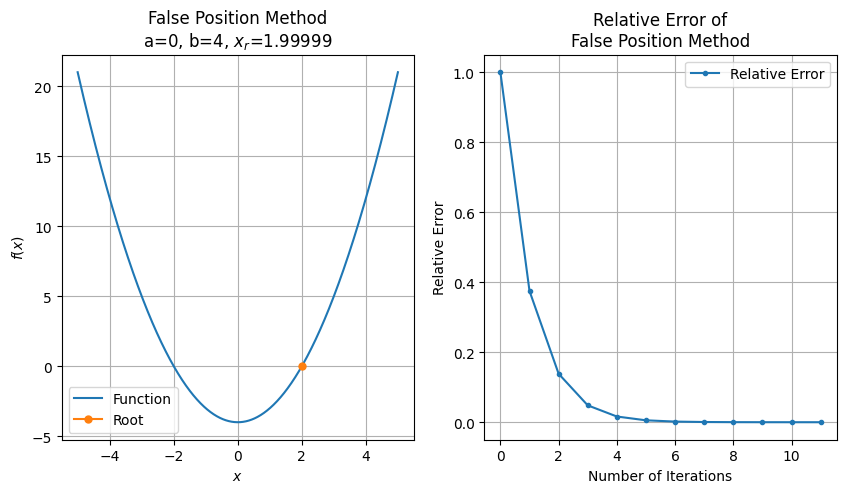

In [5]:
init_bound,final_bound = -5,5
x = np.linspace(init_bound,final_bound,1000)
fx = f(x)
fig, ax = plt.subplots(figsize=(10,5), ncols=2)
ax[0].plot(x,fx, label='Function')
ax[0].plot(xroot,f(xroot), marker='.', markersize=10, label='Root')
ax[0].set_axisbelow(True)
ax[0].grid()
ax[0].legend()
ax[0].set_title(f"False Position Method\na={a}, b={b}, $x_r$={xroot:.5f}")
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$f(x)$')

ax[1].plot(e_iter, marker='.', label='Relative Error')
ax[1].set_axisbelow(True)
ax[1].grid()
ax[1].legend()
ax[1].set_title('Relative Error of\nFalse Position Method')
ax[1].set_xlabel('Number of Iterations')
ax[1].set_ylabel('Relative Error')


As the result, the root is perfectly estimated ($x_r = 1.999992$) by this configuration after 11 iterations have been performed with the final error about 0.000008. Next, let's try to change the boundary values, $a =-4$ and $b = 0$

In [6]:
a = -4
b = 0

# creating a simple function using lambda
f = lambda x: x**2 - 4

xroot, e_iter = falseposition(f,a,b)

print('The approximation root is: %f' % xroot)
print('The relative error is: %f' % e_iter[-1])

The root is possible in the range between -4 and 0
The approximation root is: -1.999992
The relative error is: 0.000008


Text(0, 0.5, 'Relative Error')

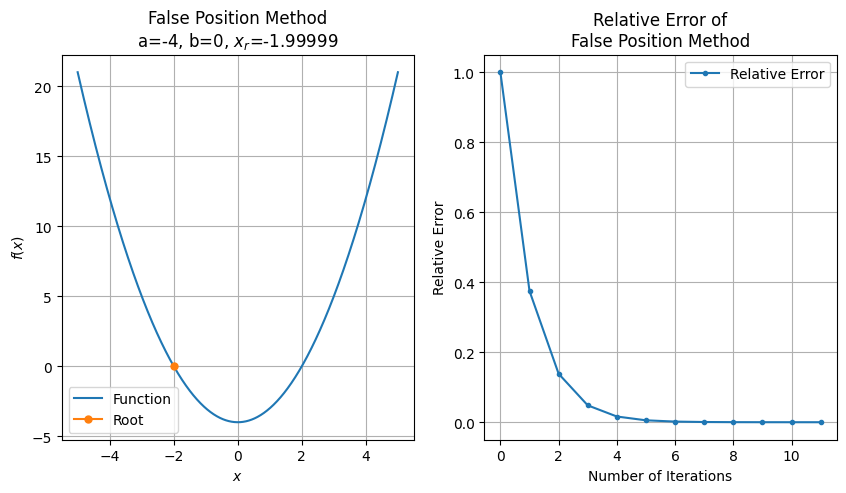

In [7]:
init_bound,final_bound = -5,5
x = np.linspace(init_bound,final_bound,1000)
fx = f(x)
fig, ax = plt.subplots(figsize=(10,5), ncols=2)
ax[0].plot(x,fx, label='Function')
ax[0].plot(xroot,f(xroot), marker='.', markersize=10, label='Root')
ax[0].set_axisbelow(True)
ax[0].grid()
ax[0].legend()
ax[0].set_title(f"False Position Method\na={a}, b={b}, $x_r$={xroot:.5f}")
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$f(x)$')

ax[1].plot(e_iter, marker='.', label='Relative Error')
ax[1].set_axisbelow(True)
ax[1].grid()
ax[1].legend()
ax[1].set_title('Relative Error of\nFalse Position Method')
ax[1].set_xlabel('Number of Iterations')
ax[1].set_ylabel('Relative Error')


The result is performed well for the second configuration. It is well calculated to get the root, where $x_r = -1.999992$ with the approximation error about 0.000008

### Case 2

There is a function of $f(x) = x^2 + 4x + 4 = 0$. Find its root!. We now, by analytical solution, this function has the two solutions of root of $-2$ with the same sign. Hence, the root lies in the negative direction.

In [8]:
a = -4
b = 0

# creating a simple function using lambda
f2 = lambda x: x**2 + 4*x + 4

xroot, e_iter = falseposition(f2,a,b)

print('The approximation root is: %f' % xroot)
# print('The relative error is: %f' % e_iter[-1])


The product between two limit function exceed boundary, f(a) * f(b) [16 > 0], Please define new initial boundaries
The approximation root is: 0.000000


In [9]:
a = -4
b = 0

# creating a simple function using lambda
f2 = lambda x: x**2 + 4*x + 4

xroot, e_iter = falseposition(f2,a,b)

print('The approximation root is: %f' % xroot)
# print('The relative error is: %f' % e_iter[-1])


The product between two limit function exceed boundary, f(a) * f(b) [16 > 0], Please define new initial boundaries
The approximation root is: 0.000000


The root is not found through this method, even the two limit values are in the negative direction. This is because the product of two function that given limit values exceed the zero. This problem is also found by using the Bisection Method.